In [57]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd 
import sys 

sys.path.append("../tools")
from plot_tools import plot_uv_map,plot_map_zoom

#folder_data = "/Odyssey/private/t22picar/data/glorys_15m/glorys_15.81m_2019-01-01-2020-01-01_4th.nc"
#ds_map = xr.open_dataset(folder_data)

specific_time = '2019-01-01'
folder_data = "/Odyssey/private/t22picar/data/glorys_15m/glorys_15.81m_2019-01-01-2020-01-01_4th.nc"
ds_map = xr.open_dataset(folder_data).sel(time=specific_time)

In [58]:
ds_map.lon

<xarray.DataArray 'lon' (lon: 1440)> Size: 12kB
array([-180.      , -179.749884, -179.499768, ...,  179.41644 ,  179.666556,
        179.916672])
Coordinates:
    depth    float32 4B ...
    time     datetime64[ns] 8B 2019-01-01
  * lon      (lon) float64 12kB -180.0 -179.7 -179.5 ... 179.4 179.7 179.9
Attributes:
    units:          degrees_east
    axis:           X
    standard_name:  longitude
    unit_long:      Degrees East
    long_name:      Longitude

In [48]:
ds_map = ds_map.pad(lon=4, mode="wrap")

In [49]:
ds_map

<xarray.Dataset> Size: 39MB
Dimensions:  (lat: 680, lon: 1448)
Coordinates:
    depth    float32 4B ...
    time     datetime64[ns] 8B 2019-01-01
  * lat      (lat) float64 5kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB 179.2 179.4 179.7 179.9 ... -179.7 -179.5 -179.2
Data variables:
    mlotst   (lat, lon) float64 8MB nan nan nan nan nan ... nan nan nan nan nan
    uo       (lat, lon) float64 8MB nan nan nan nan nan ... nan nan nan nan nan
    vo       (lat, lon) float64 8MB nan nan nan nan nan ... nan nan nan nan nan
    zos      (lat, lon) float64 8MB nan nan nan nan nan ... nan nan nan nan nan
    thetao   (lat, lon) float64 8MB nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    Conventions:               CF-1.4
    comment:                   CMEMS product
    institution:               MERCATOR OCEAN
    references:                http://www.mercator-ocean.fr
    title:                     daily mean fields from Global Ocean Physics An...
    source:                    MERCATOR GLORYS12V1
    history:                   2023/06/01 16:20:05 MERCATOR OCEAN Netcdf crea...
    copernicusmarine_version:  2.0.1

In [ ]:
list_lon = ds_map.lon[0:4] - 360.tolist() + ds_map.lon[4:-4].tolist() + (ds_map.lon[-4:] + 360).tolist()

AttributeError: 'DataArray' object has no attribute 'tolist'

In [42]:
np.linspace(-180.8, 180.8, 1448)

array([-180.8       , -180.55010366, -180.30020733, ...,  180.30020733,
        180.55010366,  180.8       ])

In [46]:
ds_map['lon'] = np.linspace(-180, 180, 1448)

In [33]:
ds_map = ds_map.pad(lon=4, mode="wrap")

In [34]:
ds_map['lon'][0:5]

<xarray.DataArray 'lon' (lon: 5)> Size: 40B
array([ 179.166324,  179.41644 ,  179.666556,  179.916672, -180.      ])
Coordinates:
    depth    float32 4B ...
    time     datetime64[ns] 8B 2019-01-01
  * lon      (lon) float64 40B 179.2 179.4 179.7 179.9 -180.0
Attributes:
    units:          degrees_east
    axis:           X
    standard_name:  longitude
    unit_long:      Degrees East
    long_name:      Longitude

In [44]:
ds_map['lon'][0:4]

<xarray.DataArray 'lon' (lon: 4)> Size: 32B
array([-180.8     , -180.550104, -180.300207, -180.050311])
Coordinates:
    depth    float32 4B ...
    time     datetime64[ns] 8B 2019-01-01
  * lon      (lon) float64 32B -180.8 -180.6 -180.3 -180.1

In [43]:
ds_map['lon'][0:4] = ds_map['lon'][0:4] - 360

TypeError: IndexVariable values cannot be modified

In [36]:
ds_map['lon'][-5:]

<xarray.DataArray 'lon' (lon: 5)> Size: 40B
array([179.800415, 180.050311, 180.300207, 180.550104, 180.8     ])
Coordinates:
    depth    float32 4B ...
    time     datetime64[ns] 8B 2019-01-01
  * lon      (lon) float64 40B 179.8 180.1 180.3 180.6 180.8

In [30]:
ds_map['lon'][0:5]

<xarray.DataArray 'lon' (lon: 5)> Size: 40B
array([-180.8     , -180.550104, -180.300207, -180.050311, -179.800415])
Coordinates:
    depth    float32 4B ...
    time     datetime64[ns] 8B 2019-01-01
  * lon      (lon) float64 40B -180.8 -180.6 -180.3 -180.1 -179.8

In [ ]:
ds_map = ds_map.pad(lon=4, mode="wrap")
# Mettre à jour les coordonnées de longitude pour refléter le nouveau domaine
ds_map['lon'] = np.linspace(-181, 181, len(ds_map['lon']))

In [88]:
# Mettre à jour les coordonnées de longitude pour refléter le nouveau domaine
ssh_glorys_pad['lon'] = np.linspace(-181, 181, len(ssh_glorys_pad['lon']))

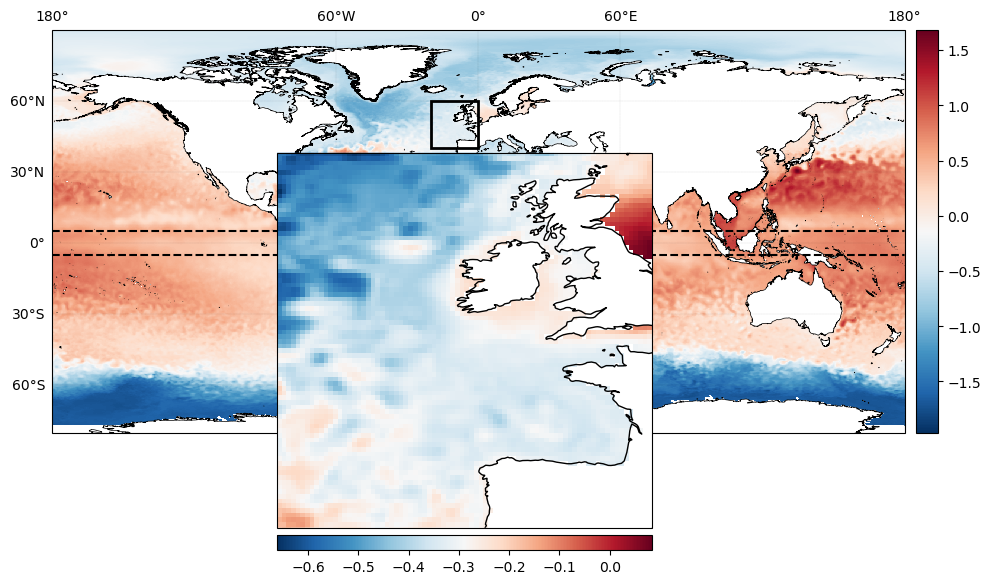

In [95]:
plot_map_zoom(ssh_glorys_pad.zos,ssh_glorys_pad.lon,ssh_glorys_pad.lat)

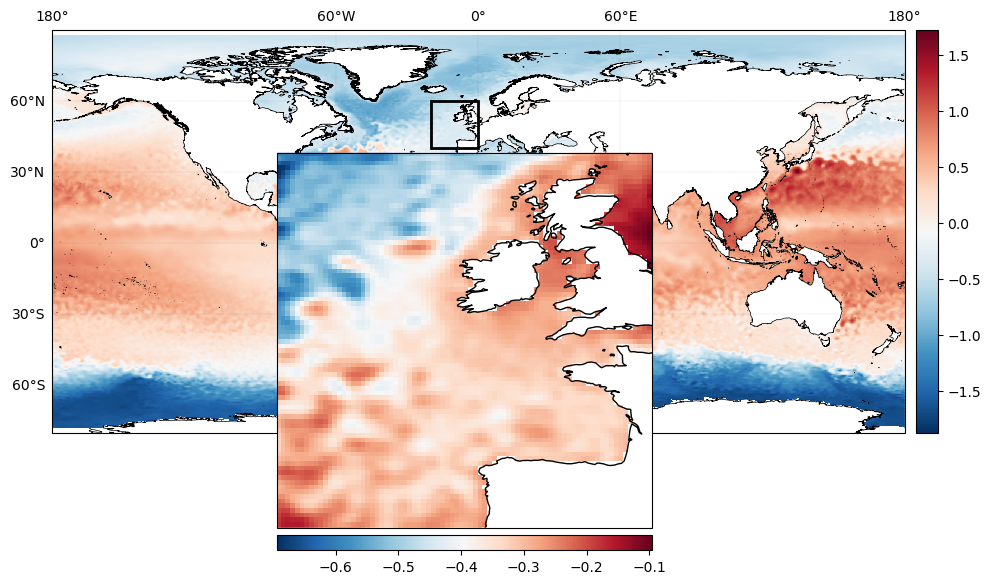

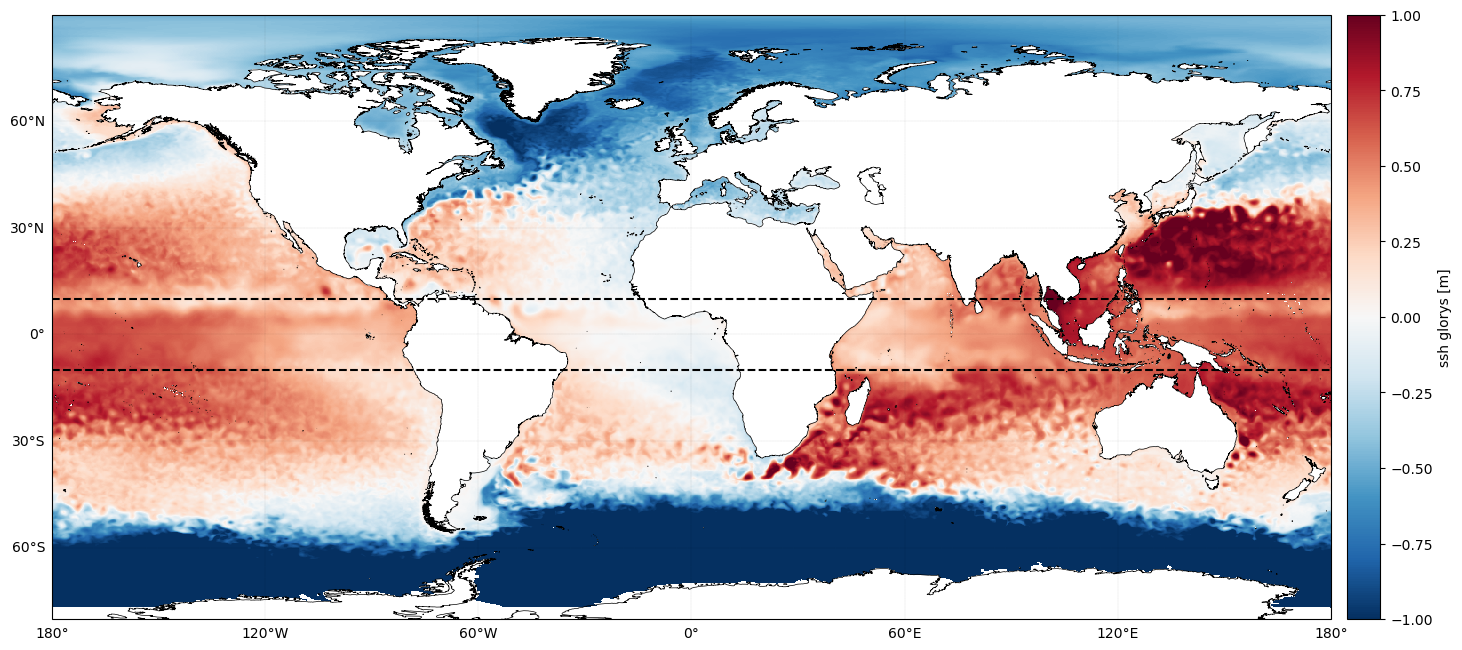

In [2]:
plot_uv_map(res_data.zos[0],res_data.lon,res_data.lat,colorbar_title="ssh glorys [m]")

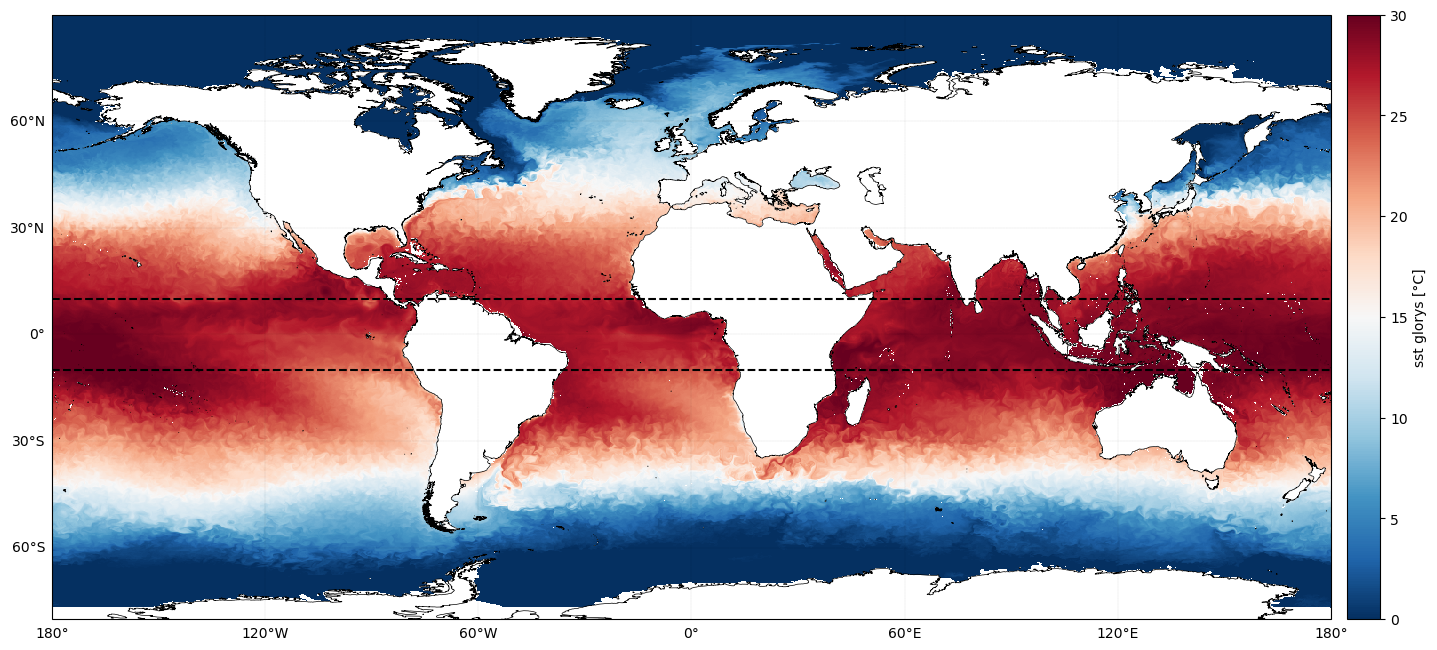

In [5]:
plot_uv_map(res_data.thetao[0],res_data.lon,res_data.lat,colorbar_title="sst glorys [°C]",vmin=0,vmax=30)

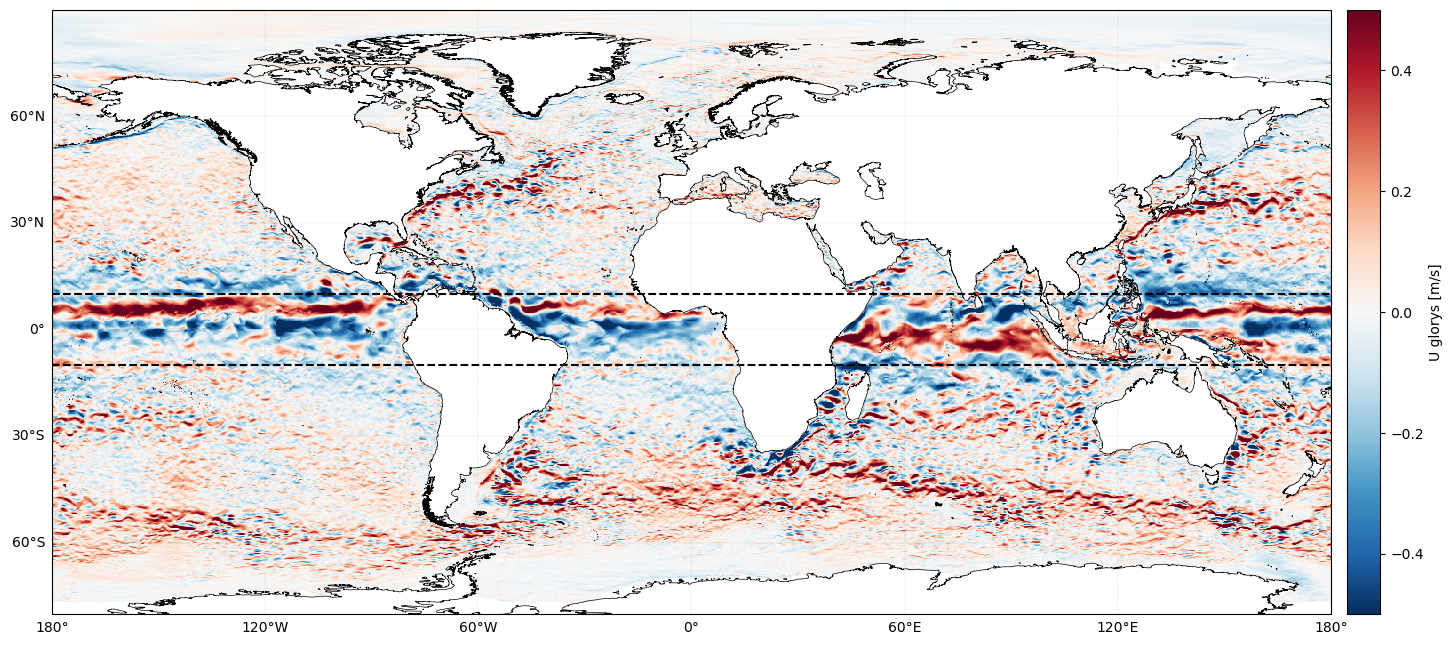

In [9]:
plot_uv_map(res_data.uo[0],res_data.lon,res_data.lat,colorbar_title="U glorys [m/s]",vmin=-0.5,vmax=0.5)

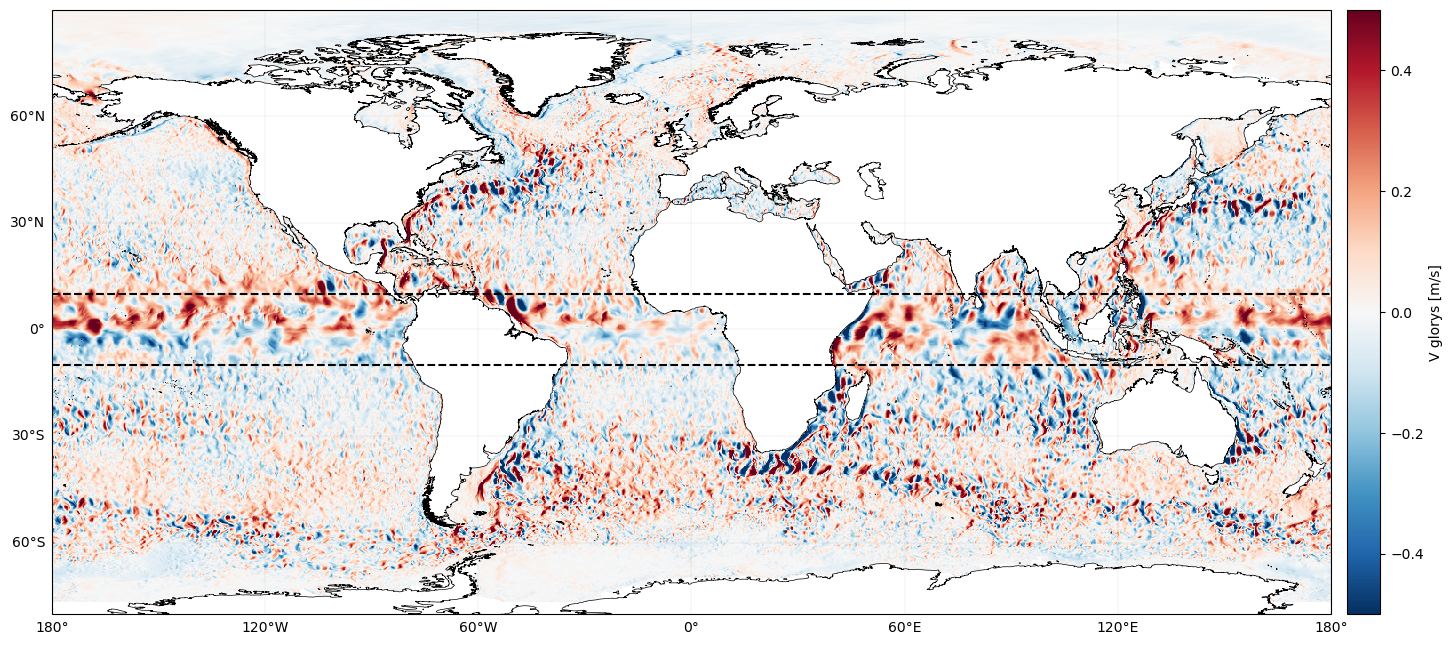

In [11]:
plot_uv_map(res_data.vo[0],res_data.lon,res_data.lat,colorbar_title="V glorys [m/s]",vmin=-0.5,vmax=0.5)